In [1]:
# create directories
import os
dataset_home = 'dataset_horse_vs_monkey/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['horses/', 'monkeys/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)

In [2]:
# seed random number generator
from random import seed
from random import random
from shutil import copyfile
from os import listdir

seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories
src_directory = 'train/'
dataset_home = 'dataset_horse_vs_monkey/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('horse'):
		dst = dataset_home + dst_dir + 'horses/'  + file
		copyfile(src, dst)
	elif file.startswith('monkey'):
		dst = dataset_home + dst_dir + 'monkeys/'  + file
		copyfile(src, dst)

In [3]:
# load horses vs monkeys dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('horse'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('horses_vs_monkeys_photos.npy', photos)
save('horses_vs_monkeys_labels.npy', labels)

(216, 200, 200, 3) (216,)


# VGG1

In [11]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define cnn model vgg1 for the horses vs monkeys dataset
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.tight_layout()
	pyplot.legend()
	pyplot.show()
	pyplot.close()

In [21]:
# run the test harness for evaluating a model

def run_test_harness(model):
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_horse_vs_monkey/train/',
		class_mode='binary', batch_size=10, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_horse_vs_monkey/test/',
		class_mode='binary', batch_size=10, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)


Found 214 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


2024-04-13 19:53:46.867486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 19:53:46.882867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 19:53:49.554317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 19:53:49.570205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 19:53:52.067239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 19:53:52.083327: W tensorflow/core/framework/local_rendezvous.cc:404]

> 53.750


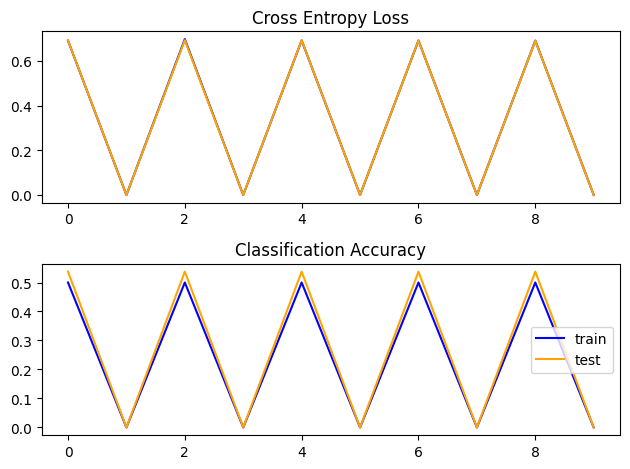

In [22]:
run_test_harness(model1)

# VGG 3

In [24]:
# define cnn model vgg3 for the horses vs monkeys dataset
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Found 214 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-13 19:54:56.081479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-04-13 19:54:56.086348: W tensorflow/core/framework/loc

> 73.750


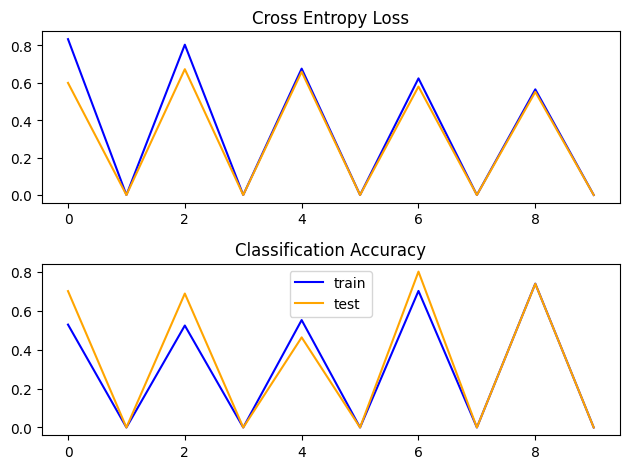

In [25]:
run_test_harness(model2)

# VGG 3 Data Augmentation

In [22]:
# create data generators
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
	width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = train_datagen.flow_from_directory('dataset_horse_vs_monkey/train/',
	class_mode='binary', batch_size=10, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('dataset_horse_vs_monkey/test/',
	class_mode='binary', batch_size=10, target_size=(200, 200))

Found 175 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [23]:
# define cnn model for vgg3 after data augmentation
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Found 175 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


C:\Users\Asus\AppData\Local\Temp\ipykernel_15364\458126217.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
C:\Users\Asus\AppData\Local\Temp\ipykernel_15364\458126217.py:14: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 58.537


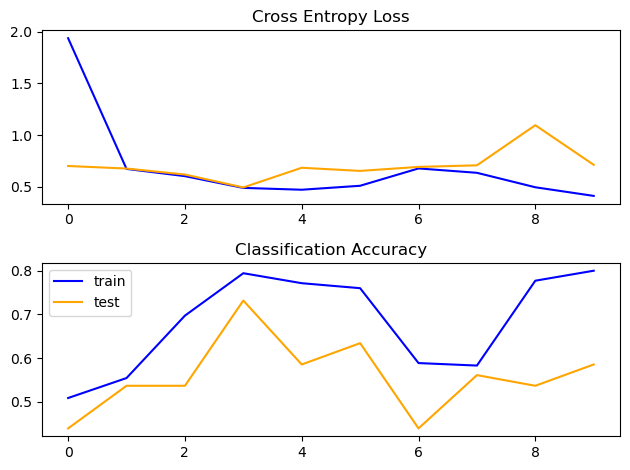

In [24]:
run_test_harness(model3)

# Transfer learning using VGG16 or VGG19 with tuning all layers (including tuning convolution layers)

In [25]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


model4 = VGG16(include_top=False, input_shape=(224, 224, 3))
# mark loaded layers as not trainable
for layer in model4.layers:
	layer.trainable = True
# add new classifier layers
flat1 = Flatten()(model4.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model4 = Model(inputs=model4.inputs, outputs=output)
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# run the test harness for evaluating a model
def run_test_harness_vgg16(model):
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_horse_vs_monkey/train/',
		class_mode='binary', batch_size=10, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_horse_vs_monkey/test/',
		class_mode='binary', batch_size=5, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

Found 175 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Epoch 1/10


C:\Users\Asus\AppData\Local\Temp\ipykernel_15364\1871410142.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


18/18 [==============================] - 57s 3s/step - loss: 155054208309044278832567928286609408.0000 - accuracy: 0.4514 - val_loss: 0.6919 - val_accuracy: 0.5610
Epoch 2/10
18/18 [==============================] - 57s 3s/step - loss: 0.6938 - accuracy: 0.5143 - val_loss: 0.6964 - val_accuracy: 0.4390
Epoch 3/10
18/18 [==============================] - 52s 3s/step - loss: 0.6936 - accuracy: 0.5143 - val_loss: 0.6989 - val_accuracy: 0.4390
Epoch 4/10
18/18 [==============================] - 54s 3s/step - loss: 0.6933 - accuracy: 0.5143 - val_loss: 0.6991 - val_accuracy: 0.4390
Epoch 5/10
18/18 [==============================] - 56s 3s/step - loss: 0.6934 - accuracy: 0.5143 - val_loss: 0.6959 - val_accuracy: 0.4390
Epoch 6/10
18/18 [==============================] - 57s 3s/step - loss: 0.6933 - accuracy: 0.5143 - val_loss: 0.6969 - val_accuracy: 0.4390
Epoch 7/10
18/18 [==============================] - 57s 3s/step - loss: 0.6933 - accuracy: 0.5143 - val_loss: 0.6971 - val_accuracy: 0.4

C:\Users\Asus\AppData\Local\Temp\ipykernel_15364\1871410142.py:42: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 43.902


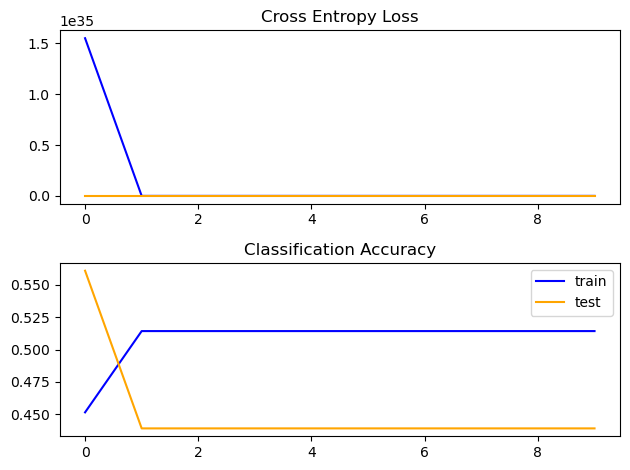

In [26]:
run_test_harness_vgg16(model4)

# Transfer learning using VGG16 or VGG19 with tuning only final MLP layers (excluding convolution layers)


In [27]:
# load model
model5 = VGG16(include_top=False, input_shape=(224, 224, 3))
# mark loaded layers as not trainable
for layer in model5.layers:
	layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model5.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model5 = Model(inputs=model5.inputs, outputs=output)
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model5.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Found 175 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Epoch 1/10


C:\Users\Asus\AppData\Local\Temp\ipykernel_15364\1871410142.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


18/18 [==============================] - 15s 837ms/step - loss: 257.4039 - accuracy: 0.6629 - val_loss: 1.5540 - val_accuracy: 0.4634
Epoch 2/10
18/18 [==============================] - 13s 749ms/step - loss: 113.8279 - accuracy: 0.5714 - val_loss: 13.7455 - val_accuracy: 0.8293
Epoch 3/10
18/18 [==============================] - 14s 755ms/step - loss: 94.3427 - accuracy: 0.8571 - val_loss: 156.8750 - val_accuracy: 0.8293
Epoch 4/10
18/18 [==============================] - 14s 785ms/step - loss: 3707.2788 - accuracy: 0.5829 - val_loss: 0.6657 - val_accuracy: 0.5854
Epoch 5/10
18/18 [==============================] - 14s 773ms/step - loss: 2.1216 - accuracy: 0.5657 - val_loss: 0.6679 - val_accuracy: 0.5854
Epoch 6/10
18/18 [==============================] - 14s 755ms/step - loss: 0.6086 - accuracy: 0.5657 - val_loss: 0.6694 - val_accuracy: 0.5854
Epoch 7/10
18/18 [==============================] - 13s 749ms/step - loss: 0.6070 - accuracy: 0.5657 - val_loss: 0.6704 - val_accuracy: 0.5854

C:\Users\Asus\AppData\Local\Temp\ipykernel_15364\1871410142.py:42: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 58.537


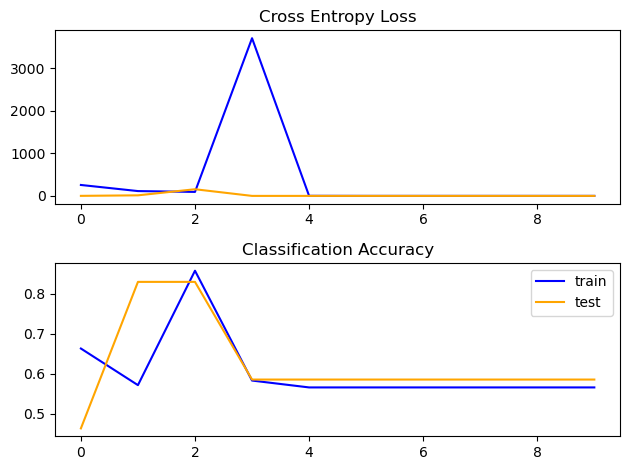

In [28]:
run_test_harness_vgg16(model5)